<a href="https://colab.research.google.com/github/BII-wushuang/Sciathon2020/blob/master/Alice_in_Quantumland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook is intended to create an open learning environment that explains the fundamentals of quantum computing at a high school level. More precisely, we introduce the user to the quantum world through an amusing storyline about Miss Schroedinger and her cat Alice.


To use this notebook, simply step through each code cell, running them in sequence to see the outcomes. For cells that include interactive elements, feel free to take your time and play around with the widgets!


# Setting Up Our Environment

First things first, make sure that qiskit and the helper library is installed and working on our instance. You can comment the pip install lines once it's here.

In [ ]:
%%capture
# Some housekeeping where we install qiskit, import the methods, and define our
# local quantum simulator
!pip install qiskit
!pip install --upgrade git+https://github.com/mpauly/quantumlib.git@quantum-cat-v2
#!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

import qiskit
import numpy as np
import matplotlib as mpl
%matplotlib inline

from qiskit.visualization import plot_histogram as plot_histogram_qiskit, plot_bloch_multivector
from qiskit.tools.jupyter import *
from qiskit.extensions import Initialize
from quantumlib import plot_state_qsphere
from quantumlib.widgets import minicomposer
from qlib_common import statevec
from IPython.core.display import display

# Use BasicAer's qasm_simulator
backend_sim = qiskit.BasicAer.get_backend('qasm_simulator')

In [ ]:
# just update the labels
def plot_histogram(data, *args, **kwargs):
  key_mapping = {
      '0': 'awake',
      '1': 'asleep',
      '00': 'awake/awake',
      '01': 'awake/asleep',
      '10': 'asleep/awake',
      '11': 'asleep/asleep'
  }
  for old_key, new_key in key_mapping.items():
    if old_key in data:
      data[new_key] = data[old_key]
      del data[old_key]
  return plot_histogram_qiskit(data, *args, **kwargs)

def random_state(num):
    """
    Return a random quantum state from the uniform (Haar) measure on
    state space.
    Args:
        num (int): the number of qubits
    Returns:
        ndarray:  state(2**num) a random quantum state.
    """
    # Random array over interval (0, 1]
    x = np.random.random(1 << num)
    x += x == 0
    x = -np.log(x)
    sumx = sum(x)
    phases = np.random.random(1 << num)*2.0*np.pi
    return np.sqrt(x/sumx)*np.exp(1j*phases)

# this class exists to remap calls to qiskit to a single kitten
class QuantumCat(qiskit.QuantumCircuit):
  def __init__(self, *args):
    super().__init__(1,1)

  def sleep(self):
    self.x(0)

  def feed_quantum_cookie(self):
    self.h(0)

  def take_picture(self):
    self.measure(0,0)

# this class implements a pair of two kittens or two entangled qbits
ALICE = 0
BOB = 1

class TwoQuantumCats(qiskit.QuantumCircuit):
  def __init__(self, *args):
    super().__init__(2,2)

  def feed_quantum_cake(self, bit):
    self.x(bit)

  def feed_quantum_cookie(self, bit):
    self.h(bit)

  def tangle(self, bit1, bit2):
    self.cx(bit1, bit2)

  def take_picture(self, bit):
    # the first quantum bit is mapped to the first classical bit, etc.
    self.measure(bit, bit)

# Alice in Quantum Land


Miss Schroedinger is a scientist who has a cat named Alice. One day when shopping for her cat, Miss Schroedinger picks up quantum milk, which opens up a new world full of crazy effects. When the cat starts sipping quantum milk, it turns her into a quantum cat, the ket. In this quantum world two different states exist for Alice: Asleep or awake. This can be written as $|\rm Alice\rangle = |awake\rangle$ 





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


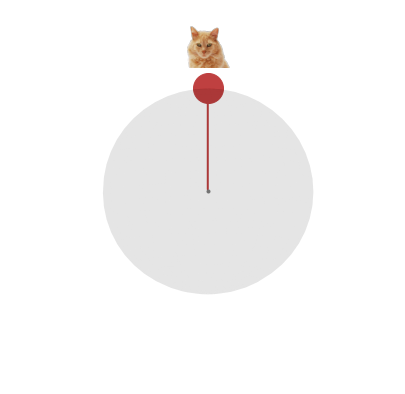

In [ ]:
alice = QuantumCat()
state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

and $|\rm Alice\rangle = |asleep\rangle$ ,

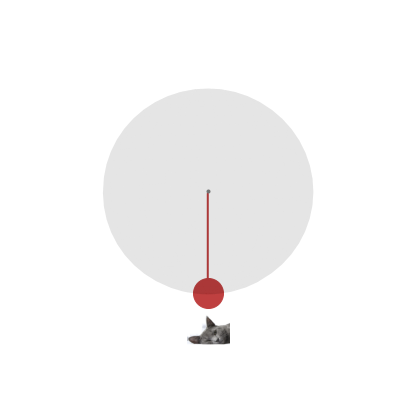

In [ ]:
alice.sleep()
state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

When Alice gets hungry, Miss Schroedinger feeds her cans of quantum food. When Alice is awake, 
$\rm |Alice\rangle = |awake\rangle$.
Eating one can of quantum food makes her slightly tired, a state described as half asleep, half awake:
$|\rm Alice \rangle = \frac{1}{\sqrt 2} |awake\rangle + \frac{1}{\sqrt 2} |asleep\rangle$


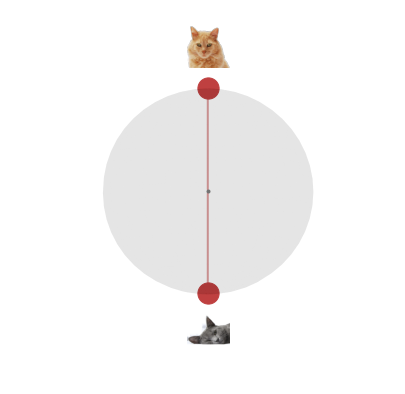

In [ ]:
alice = QuantumCat()
alice.feed_quantum_cookie()
state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

Eating one more can turns her fully asleep
$| \rm Alice \rangle = |asleep\rangle$

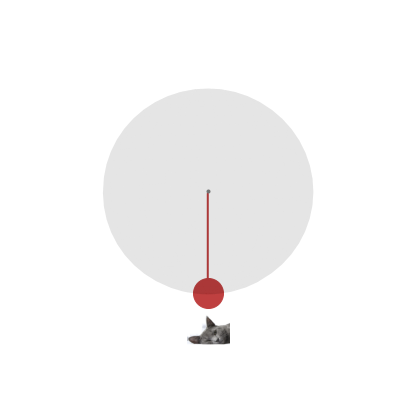

In [ ]:
alice = QuantumCat()
alice.sleep()
state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

If at this point Miss Schroedinger feeds Alice one more can, Alice wakes up a little and is now half asleep, half awake.
$| \rm Alice \rangle = \frac{1}{\sqrt 2}|asleep\rangle - \frac{1}{\sqrt 2} |awake\rangle$.

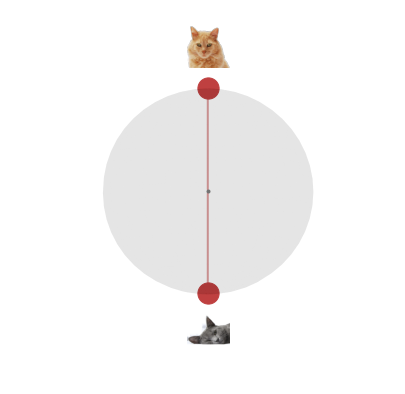

In [ ]:
alice.feed_quantum_cookie()
alice.z(0) # this feeding alice more ellaborate food
state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

Finally, consuming a fourth can of quantum food brings Alice back almost to her initial state of being fully awake.
$| \rm Alice \rangle = -|awake\rangle$

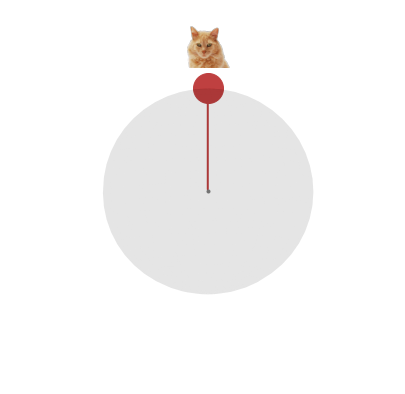

In [ ]:
alice.feed_quantum_cookie()
state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

Miss Schroedinger is very proud and excited about her cat which can be in intermediate states of half asleep, half awake at the same time. Miss Schroedinger wants to share this impressive phenomenon on her social media account and takes a picture of Alice. To her surprise, whenever she takes a picture of Alice, the cat loses its quantum superpower and turns back into a normal (classical) cat, which is either awake or asleep. On average after taking several pictures Alice is awake in half of the pictures taken. 


{'0': 527, '1': 473}


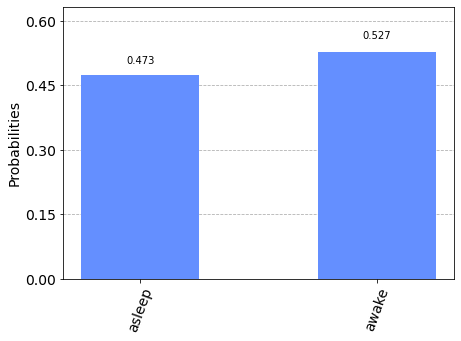

In [ ]:
# this defines a recipe of what we want to do
alice = QuantumCat()
alice.feed_quantum_cookie()
alice.take_picture()
# this runs our recipe 1000 times
result = qiskit.execute(alice, backend_sim, shots = 1000).result() # we run the simulation
counts = result.get_counts() # we get the counts
print(counts)
plot_histogram(counts)

# Alice and Bob

One afternoon Miss Pauli, a very good friend of Miss Schroedinger, visits for afternoon tea. Miss Pauli also happens to have a cat called Bob. Whenever they meet up, she brings Bob with her, so that the two cats can play together with a ball of wool. Miss Schrödinger is very excited about what she has discovered earlier and tells Miss Pauli about it. They decide to give quantum milk to both cats and see what happens during their playtime. Due to quantum effects, the cats become a cute mess of two kittens tangled up in wool. Their quantum state is described by
$| \rm Alice \& Bob \rangle = \frac{1}{\sqrt 2} |awake\rangle⊗|awake\rangle+ \frac{1}{\sqrt 2} |asleep\rangle⊗|asleep\rangle$


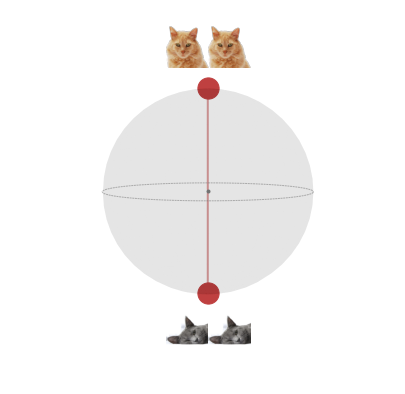

In [ ]:
catpair = TwoQuantumCats()

# Alice eats a cookie
catpair.feed_quantum_cookie(ALICE)
# The two cats play
catpair.tangle(ALICE, BOB)

state = statevec(catpair)
plot_state_qsphere(state.data, show_state_cats=True, add_color_wheel=False)

The two entangled cats play for the whole afternoon while their owners chat over tea and biscuits. Suddenly, Miss Pauli realises how much time has passed and leaves in a hurry without realising that Bob is still in an entangled quantum state with Alice. Later that evening Miss Pauli takes a picture of Bob to share on her social media side. The same effect as seen before with Alice happens and turns Bob back into a classic sleeping cat. Upon logging into her social media platform she sees a picture of Alice uploaded by Miss Schroedinger. Strangely enough Alice is also peacefully asleep. This is understandable as the two kittens had a lot of fun earlier that day.


They meet again over the course of several days and every time the two friends are chatting, the kittens sip quantum milk and play with a ball of wool. As happened on the first occasion, Miss Schroedinger and Miss Pauli part their ways, independently take pictures of their cats, and proudly upload them on social media. After a month Miss Pauli notices a peculiar feature; after each visit, the picture Miss Schroedinger took of Alice matches the picture of Bob Miss Pauli took. Upon taking a picture the two entangled cats end up in the same state, no matter where they were located. 




{'00': 527, '11': 473}


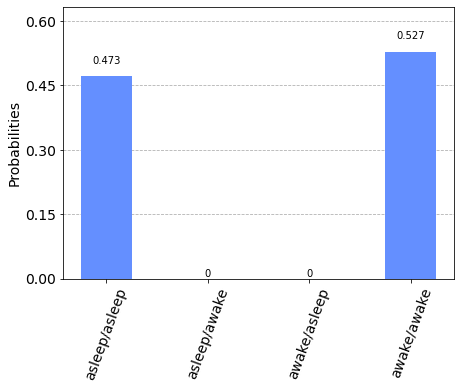

In [ ]:
catpair = TwoQuantumCats()

# Alice eats a cookie
catpair.feed_quantum_cookie(ALICE)
# The two cats play
catpair.tangle(ALICE, BOB)

# pictures are taken #cat
catpair.take_picture(ALICE)
catpair.take_picture(BOB)

# do this very often
result = qiskit.execute(catpair, backend_sim, shots = 1000).result() # we run the simulation
counts = result.get_counts() # we get the counts
print(counts)
counts.update({'01': 0, '10': 0})
plot_histogram(counts)

# Link to Reality

So far, we have been talking about Miss Schroedinger, Miss Pauli and their fantastic quantum cats. But does this story have anything to do with the real world? It turns out that the real world is full of surprises and counterintuitive phenomena! In what follows we translate the cat story and what we learnt there into the language normally used by researchers in quantum computing.

A quantum cat, which can be either awake or asleep (or a bit of both) corresponds to a qubit. A qubit captures an idea of an object which can be in two states, typically denoted by $|0\rangle$ and $|1\rangle$. This is in analogy with a classical bit, which can be either 0 or 1. Recall that there is a crucial difference between a quantum cat (a qubit) and a classical one (a bit). Namely, a quantum cat can be in a superposition of being awake and asleep. In the language of quantum information, this would correspond to a qubit being in a superposition of two states $|0\rangle$ and $|0\rangle$, for instance in a state $\frac{1}{\sqrt 2}|0\rangle+\frac{1}{\sqrt 2}|1\rangle$.

We cannot directly observe the state of a quantum cat, or the state of a qubit. In order to find out what it is we need to take a picture of it or, as a quantum scientist would say, to make a measurement. The measurement can yield only two outcomes, which are “awake” (0) or “asleep” (1). Note that it is impossible to get a “mixed outcome”, a bit of awake and a bit of asleep, in a single measurement!

When we have two or more quantum cats (or qubits), we can entangle them by letting them play with a ball of wool (or applying a two-qubit gate, such as a controlled-NOT gate). This way we can create an entangled state of two cats. A strange feature of this state, as observed by Miss Pauli, is that despite independently taking pictures of each cat what we see is the same. In the quantum computing language, the measurement outcomes of two entangled qubits are correlated, and what we did see is that whenever we measure the first qubit to be 0, the second qubit is also 0; similarly if the first one is 1, then the second one has to be 1 as well. This very peculiar feature caused a lot of headache even for such scientists as Einstein!

We would like to mention that there are many operations we can apply to a qubit. Those single-qubit operations can include the Hadamard gate $H$, the Pauli $X$, $Y$ and $Z$ gates, the $S$ gate to name a few. For instance, the Pauli $Z$ gate does not exchange the states $|0\rangle$ and $|1\rangle$; rather, it introduces a (-1) phase if the qubit is in the $|1\rangle$ state. To be more precise, the Pauli $Z$ gate changes the state of the qubit as follows: $|0\rangle \mapsto |0\rangle$ and $|1\rangle \mapsto -|1\rangle$. In general, the phase is a complex number and to illustrate it we can use colors. This is something keen-eyed observers may have noticed in some of the earlier examples, though for simple cases it is a minor detail.

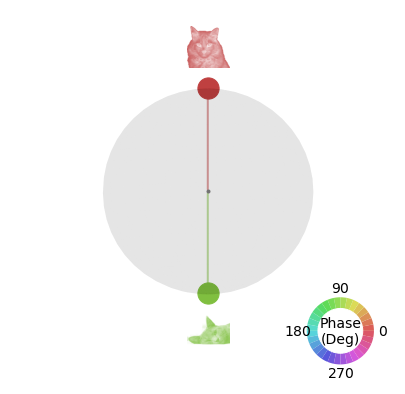

In [ ]:
alice = QuantumCat()
alice.feed_quantum_cookie()
alice.s(0) # more ellaborate food

state = statevec(alice)
plot_state_qsphere(state.data, show_state_cats=True, color_cats=True)

# Example: Quantum Teleportation
It turns out that using the concepts we already introduced one can explain a protocol which allows to teleport an arbitrary quantum state! The idea is quite simple and we illustrate the corresponding quantum circuit in the figure. First, Miss Schroedinger and Miss Pauli meet and prepare an entangled state of two qubits $|0\rangle\otimes|0\rangle+|1\rangle⊗1\rangle$. Then, they go home taking with them one qubit each. If at some later time Miss Schroedinger wants to send to Miss Pauli an arbitrary quantum state, all what she needs to do is: 1) apply a controlled-NOT gate between that arbitrary state and the qubit entangled with Miss Pauli’s qubit, 2) measure both of her qubits, and 3) call Miss Pauli to tell her the measurement outcomes. Depending on the measurement outcomes Miss Pauli applies certain operations to her qubit, recovering the initial arbitrary quantum state Miss Schroedinger wanted to send to her. Notice that no qubit is sent directly between Miss Schroedinger and Miss Pauli, then just talk over the phone. Sounds like magic? No, it is just a basic quantum computation protocol!

To illustrate how a circuit like this is made, read through the following code block and focus on the parts that add instructions to the circuit. Once you've given it a read, run the cell and watch Miss Schroedinger's first qubit get teleported and and can be reconstructed by Miss Pauli by applying some conditional operations on her qubit. You can run it several times and, despite being a new random state each run, it always works!

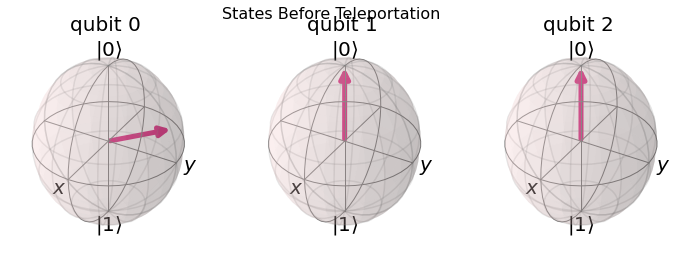

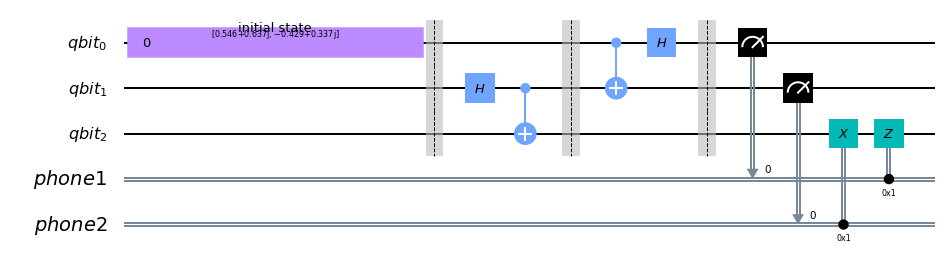

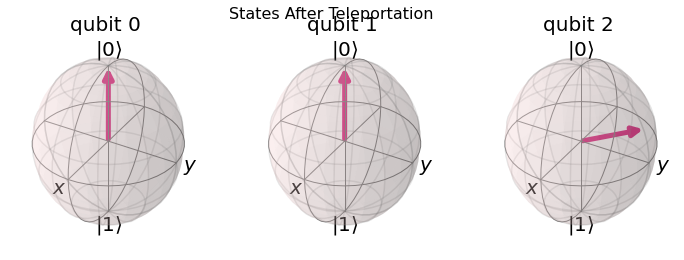

In [ ]:
# First, we'll make the circuit. It needs 3 qubits: the pair shared between
# Miss Pauli and Miss Schroedinger and the state that we want to teleport
# We are also building some classical bits into the circuit so we can measure it
# You can think of these classical registers as the phone line
cr1 = qiskit.ClassicalRegister(1, 'phone1')
cr2 = qiskit.ClassicalRegister(1, 'phone2')
sv_backend = qiskit.BasicAer.get_backend('statevector_simulator')

circuit = qiskit.QuantumCircuit(qiskit.QuantumRegister(3, 'qbit'),cr1,cr2)

# Here we initialize the first qbit with a random state in order to demonstrate
# that we can teleport every state
psi = random_state(1)
init = Initialize(psi)
init.label = "initial state"
circuit.append(init, [0])

# display the states before teleportations
sv = qiskit.execute(circuit, sv_backend).result().get_statevector()
display(plot_bloch_multivector(sv,title='States Before Teleportation')) 

# We draw barriers between the different measurement procedures.  This is not
# really necessary, but helps in understanding the visualization below.
circuit.barrier()

# Next, entangle the pair. Let's choose qbits 1 and 2 for that
circuit.h(1) # feeding quantum cookies
circuit.cx(1,2) # letting cats play

# Since Miss Pauli and Miss Schroedinger will be physically separated, let's add
# another barrier to the circuit
circuit.barrier()

# Miss Schroedinger wants to send state 0 to Miss Pauli so we need to entangle states 0 and 1
circuit.cx(0,1) # another entangling
circuit.h(0) # and cookies again

circuit.barrier()

# Miss Schroedinger now needs to make a measurement of both of her states and
# send the results to Miss Pauli
circuit.measure(0,0)
circuit.measure(1,1)

# Miss Pauli gets on the phone and listens to what Miss Schroedinger measured.
# If she measured a 1 in the state she's sending (2), Miss Pauli needs to
# use a X gate on her shared qubit. If Miss Schroedinger measured a 1 on her
# shared qubit, then Miss Pauli will need to also use a Z gate.
# If the measurement was 0, then nothing is done.
circuit.x(2).c_if(cr2, 1)
circuit.z(2).c_if(cr1, 1)

display(circuit.draw(output="mpl"))

# After this, Miss Pauli's shared state will now be the same as the one that
# Miss Schroedinger wanted to send! We can check this by printing out the
# state and comparing to the one from above

sv = qiskit.execute(circuit, sv_backend).result().get_statevector()
display(plot_bloch_multivector(sv,title='States After Teleportation'))


As you can see, the state of qubit 0 was teleported to qubit 2. The diagram above explains what is going on. The first three lines correspond to qubits, the last two to classical connections/registers.

Hopefully, the above was an entertaining introduction to the misterious world of quantum mechanics and quantum computing. Now it is time to explore more on your own. You can edit all the examples above or play with the quantum simulator below. If you want to investigate further you could take a look at the `qiskit` library.

# Qubit Sandbox

Lastly, we let the curious student play with different gates in the following qubit simulation. Try changing the number of qubits as well to see what sorts of combinations you can come up with!

In [ ]:
minicomposer(1, qsphere=True)

Label(value='Select a gate to add to the circuit:')

HTML(value='')